# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)

### Richard Tran


In [2]:
# Get the datasets
!curl.exe --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat
!curl.exe --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11244  100 11244    0     0  66928      0 --:--:-- --:--:-- --:--:-- 67329
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2844  100  2844    0     0  44437      0 --:--:-- --:--:-- --:--:-- 45142


In [9]:
# Look at the datasets
%cd C:\Users\richa\Documents\SPR22\csce5218\deep_learning
    
with open('test.dat') as f:
    for line in f:
        print(line)

C:\Users\richa\Documents\SPR22\csce5218\deep_learning
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13

1	1	1	1	0	0	1	1	0	0	0	1	1	0

0	0	0	1	0	0	1	1	0	1	0	0	1	0

0	1	1	1	0	1	1	1	1	0	0	0	1	0

0	1	1	0	1	0	1	1	1	0	1	0	1	0

0	1	0	0	0	1	0	1	0	1	0	0	1	0

0	1	1	0	0	1	1	1	1	1	1	0	1	0

0	1	1	1	0	0	1	1	0	0	0	1	1	0

0	1	0	0	1	0	0	1	1	0	1	1	1	0

1	1	1	1	0	0	1	1	0	0	0	0	1	0

1	0	1	1	1	1	1	0	0	0	0	0	1	0

1	0	0	0	1	0	0	1	1	0	1	1	1	0

0	0	1	0	0	1	1	0	0	0	0	1	1	0

0	1	0	1	1	1	0	0	0	0	0	1	1	0

0	1	0	0	0	1	1	1	0	1	1	1	1	0

1	1	1	0	1	0	0	1	0	1	1	0	1	1

1	0	0	1	0	0	1	1	0	0	1	1	1	0

0	0	0	1	0	1	1	0	1	1	1	1	1	0

1	0	1	0	1	1	0	0	0	1	0	0	1	0

0	1	1	0	1	0	1	0	1	1	1	0	1	1

0	1	0	0	1	1	1	1	1	1	0	0	1	0

1	1	0	1	0	1	1	0	1	0	0	0	1	0

1	0	1	1	0	1	0	0	0	0	1	1	1	1

1	0	1	1	1	1	0	1	1	0	1	0	1	1

1	0	0	1	0	0	0	1	0	1	0	1	1	1

1	1	0	1	1	0	1	1	0	0	1	0	1	0

0	0	0	0	1	1	1	0	0	1	0	1	1	0

1	1	1	0	0	0	1	0	0	0	1	1	1	0

1	0	1	0	0	1	0	0	0	0	1	1	1	0

1	0	1	1	1	1	0	0	0	0	1	1	1	0

0	1	0	0	1	1	1	0	1	1	0	1	1	1

0	1	1	1	0	0	1	0	1	1	1	0	1	1

1	0

In [10]:
# Look at the datasets
with open('train.dat') as f:
    for line in f:
        print(line)

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	

1	1	0	0	0	0	0	0	1	1	0	0	1	0

0	0	1	1	0	1	1	0	0	0	0	0	1	0

0	1	0	1	1	0	1	0	1	1	1	0	1	1

0	0	1	0	0	1	0	1	0	1	1	1	1	0

0	1	0	0	0	0	0	1	1	1	1	1	1	0

0	1	1	1	0	0	0	1	0	1	1	0	1	1

0	1	1	0	0	0	1	0	0	0	0	0	1	0

0	0	0	1	1	0	1	1	1	0	0	0	1	0

0	0	0	0	0	0	1	0	1	0	1	0	1	0

1	0	1	1	1	0	0	0	1	1	1	0	1	1

0	1	1	0	1	0	1	1	1	1	1	1	1	1

0	0	1	1	0	0	1	0	0	1	1	1	1	0

1	0	1	1	0	0	1	1	0	1	0	0	1	1

0	0	1	1	0	0	0	0	1	0	1	1	1	0

1	0	0	0	0	0	1	0	1	1	0	1	1	0

0	1	1	1	1	1	0	0	1	0	1	0	1	1

1	0	0	0	1	0	1	1	1	1	1	1	1	0

1	0	0	0	0	1	1	0	1	1	1	1	1	0

1	0	0	1	0	1	0	1	1	0	0	1	1	0

0	0	1	1	0	1	1	0	0	0	0	1	1	0

1	1	1	0	0	1	1	1	1	1	0	1	1	1

0	1	1	1	1	1	0	0	0	1	0	1	1	0

0	0	1	1	0	1	0	1	0	1	1	1	1	0

1	0	0	1	0	1	1	1	1	0	0	1	1	0

0	0	1	0	0	0	1	0	0	0	0	0	1	0

1	0	1	0	0	0	1	1	0	0	0	1	1	0

1	0	0	0	0	1	0	0	0	1	0	1	1	0

1	0	0	0	1	1	1	0	0	1	0	1	1	0

1	0	0	0	0	0	1	1	1	1	1	0	1	0

0	0	1	1	0	1	0	1	0	0	1	0	1	0

0	1	1	0	0	0	1	1	1	1	0	1	1	0

0	0	0	0	1	1	1	1	0	0	0	0	1	0

0	1	1	0	1	1	1	1	0	0	0	1	1	0

### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [85]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [[-1] + instance]
        data += instance
    return data


def dot_product(array1, array2):
    # Return dot product of array 1 and array 2
    return sum([i*j for (i, j) in zip(array1, array2)])


def sigmoid(x):
    # Return output of sigmoid function on x
    return math.exp(x)/(math.exp(x)+1)

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weights, instance):
    # return the output of the model 
    return sigmoid(dot_product(weights, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    # return the prediction of the model
    output = sigmoid(dot_product(weights, instance))
    return 1 if output >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not have to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #step: initializing weights
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #steps: error calculation by comparing output vs. true value
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #steps: updating weights by minimizing error
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [86]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the following code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only).



* We can obtain a more accurate error rate in the first code snippet vs. the second. This is because in the second one, we are using the predict function which returns our output of either 1 or 0, and if we run that against the actual data (instance[-1]), we would only obtain the values: -1, 0, and 1. Conversely, the sigmoid function will return continuous values depending on our dot product which is helpful in minimizing error rates since we can determine better accuracy between values that seem close, where our predict function wouldn't give us the granular detail that we need. This helps us better calculate our gradient function for weight updates.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [89]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all of the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one using more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



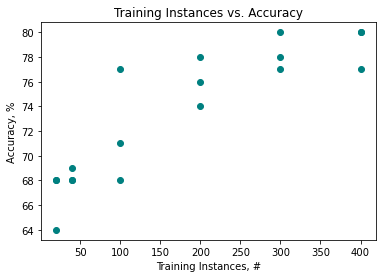

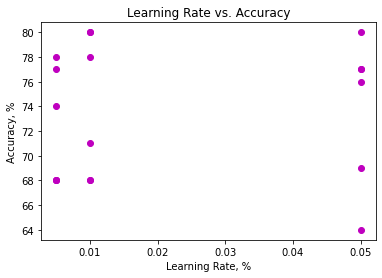

In [100]:
# plot data from Question 2
import matplotlib.pyplot as plt

tr=[20,40,100,200,300,400,20,40,100,200,300,400,20,40,100,200,300,400]
acc=[68,68,68,74,78,77,68,68,71,78,80,80,64,69,77,76,77,80]
lr=[0.005,0.005,0.005,0.005,0.005,0.005,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.05,0.05,0.05,0.05,0.05]


plt.scatter(tr,acc,c='teal')

plt.xlabel('Training Instances, #')
plt.ylabel('Accuracy, %')
plt.title('Training Instances vs. Accuracy')

plt.show()

plt.scatter(lr,acc,c='m')

plt.xlabel('Learning Rate, %')
plt.ylabel('Accuracy, %')
plt.title('Learning Rate vs. Accuracy')

plt.show()

* A: No, there is one case with an 80% accuracy (highest), but the perceptron was trained only on 75% on the training dataset (tr = 300, epochs = 100, lr = 0.01, tested with 100 instances). This was the 11th run.

* B: It just so happens that the test cases had closer outcomes when you included only 25% (tr = 100) of the training dataset vs. 50% (tr = 200). In this example, only 20 epochs occurred, but if one increased the number of epochs, as a general rule (for the most part) one will obtain a higher accuracy when including more training data (but not necessarily so).

In [96]:
# Can you get higher accuracy with additional hyperparameters (higher than 80.0)?
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [75,85,90,95, 100] # percent of the training dataset to train with
num_epochs = [20,50,100,300,500]     # number of epochs
lr_array = [0.01, 0.05, 0.1, 0.2, 0.5]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 300, epochs: 500, learning rate: 0.010; Accuracy (test, 100 instances): 77.0
#tr: 340, epochs: 500, learning rate: 0.010; Accuracy (test, 100 instances): 79.0
#tr: 360, epochs: 500, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 380, epochs: 500, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 500, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 300, epochs: 500, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 340, epochs: 500, learning rate: 0.050; Accuracy (test, 100 instances): 79.0
#tr: 360, epochs: 500, learning rate: 0.050; Accuracy (test, 100 instances): 79.0
#tr: 380, epochs: 500, learning rate: 0.050; Accuracy (test, 100 instances): 79.0
#tr: 400, epochs: 500, learning rate: 0.050; Accuracy (test, 100 instances): 79.0
#tr: 300, epochs: 500, learning rate: 0.100; Accuracy (test, 100 instances): 76.0
#tr: 340, epochs: 500, learning rate: 0.100; Accuracy (test, 100 instances): 79.0
#tr: 360, epochs

* C: With respect to the above code cell, on the 23rd run, an accuracy of 81% was achieved. Here are the respective hyperparameters: #tr: 360, epochs: 500, learning rate: 0.500; Accuracy (test, 100 instances): 81.0. It is not easy achieving a higher accuracy as many adjustments were made.

In [97]:
# Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [100, 150, 200, 250, 300]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 300, learning rate: 0.005; Accuracy (test, 100 instances): 70.0
#tr: 40, epochs: 300, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 100, epochs: 300, learning rate: 0.005; Accuracy (test, 100 instances): 73.0
#tr: 200, epochs: 300, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 300, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 300, learning rate: 0.005; Accuracy (test, 100 instances): 79.0
#tr: 20, epochs: 300, learning rate: 0.010; Accuracy (test, 100 instances): 67.0
#tr: 40, epochs: 300, learning rate: 0.010; Accuracy (test, 100 instances): 72.0
#tr: 100, epochs: 300, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 200, epochs: 300, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 300, learning rate: 0.010; Accuracy (test, 100 instances): 79.0
#tr: 400, epochs: 300, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 300

* D: As you can see, by comparing the results obtained by only increasing epochs vs. the results in **Question 2**, the accuracy rates aren't that much better and can even be said to be worse in many runs: (i.e. #tr: 40, epochs: 300, learning rate: 0.050; Accuracy (test, 100 instances): 59.0), (80% was only achieved twice versus three times), etc.